In [1]:
import numpy as np
import pandas as pd

In [2]:
books = pd.read_csv('books.csv')
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11/1/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(11127, 13)
(1149780, 3)
(278858, 3)


In [7]:
books.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
  num_pages               0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
Unnamed: 12           11123
dtype: int64

In [8]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [9]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [10]:
books.duplicated().sum()

0

In [11]:
ratings.duplicated().sum()

0

In [12]:
users.duplicated().sum()

0

## Popularity Based Recommender System

In [13]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [14]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [15]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [16]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [17]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [18]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','num_ratings','avg_rating']]

In [19]:
popular_df.head(5)

,Book-Title,Book-Author,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,556,5.183453


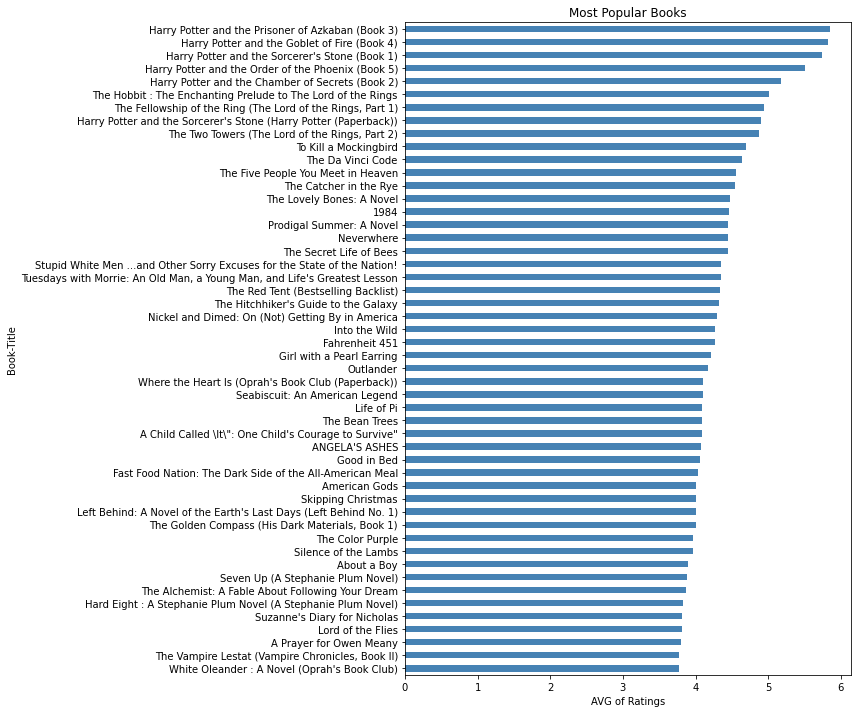

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume you have already loaded the popular_df DataFrame

# Sort the DataFrame by the number of ratings
popular_df = popular_df.sort_values(by='avg_rating', ascending=False)

# Set the Book-Title as the index
popular_df = popular_df.set_index('Book-Title')

# Create the horizontal bar chart
ax = popular_df['avg_rating'].plot.barh(figsize=(8, 12), color='steelblue')

# Customize the chart
ax.set_title('Most Popular Books')
ax.set_xlabel('AVG of Ratings')
ax.invert_yaxis()
plt.show()

## Collaborative Filtering Based Recommender System

In [21]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [22]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [23]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [24]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [25]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [26]:
pt.fillna(0,inplace=True)

In [27]:
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Without Train Test

In [28]:
from sklearn.neighbors import NearestNeighbors

# Fit KNN model to the ratings matrix
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(pt)

def g_recommend(book_name, K=5):
    # Get index of book in the ratings matrix
    book_idx = pt.index.get_loc(book_name)

    # Use KNN to find K most similar books
    distances, indices = model_knn.kneighbors(pt.iloc[book_idx,:].values.reshape(1,-1),n_neighbors=K+1)
    
    # Exclude the first result since it will be the book itself
    indices = indices.squeeze()[1:]
    distances = distances.squeeze()[1:]

    # Get the titles and authors of the recommended books
    titles = []
    authors = []
    for idx in indices:
        temp_df = books[books['Book-Title'] == pt.index[idx]]
        titles.append(temp_df['Book-Title'].iloc[0])
        authors.append(temp_df['Book-Author'].iloc[0])

    # Return list of recommended books with titles and authors
    return list(zip(titles, authors))


In [29]:
# Evaluate model on test data
test_books = ['The Notebook', 'Animal Farm']
for book_name in test_books:
    recommended_books = g_recommend(book_name, K=5)
    print(f"Recommended books for {book_name}:")
    for title, author in recommended_books:
        print(f"\t- {title} by {author}")

Recommended books for The Notebook:
	- A Walk to Remember by Nicholas Sparks
	- The Rescue by Nicholas Sparks
	- One Door Away from Heaven by Dean R. Koontz
	- Toxin by Robin Cook
	- The Five People You Meet in Heaven by Mitch Albom
Recommended books for Animal Farm:
	- 1984 by George Orwell
	- Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson by Louise Rennison
	- Midnight by Dean R. Koontz
	- Second Nature by Alice Hoffman
	- Call of the Wild by Jack London


In [30]:
from scipy.sparse.linalg import svds
from sklearn.preprocessing import normalize

# Perform SVD on the ratings matrix
U, s, Vt = svds(pt, k=50)
S = np.diag(s)
V = Vt.T

# Normalize the U and V matrices
U_norm = normalize(U, axis=1)
V_norm = normalize(V, axis=1)

def gg_recommend(book_name, K=5):
    # Get index of book in the ratings matrix
    book_idx = pt.index.get_loc(book_name)

    # Get the factorized representation for the target book
    book_representation = U_norm[book_idx].dot(S).dot(V_norm.T)

    # Compute the similarity scores between the target book and all other books
    sim_scores = U_norm.dot(S).dot(V_norm.T).dot(book_representation.T).flatten()

    # Sort the books by similarity score and get the top K+1 books (excluding the book itself)
    top_books = sorted(list(zip(pt.index, sim_scores)), key=lambda x: x[1], reverse=True)[1:K+1]

    # Get the titles and authors of the recommended books
    titles = []
    authors = []
    for book in top_books:
        temp_df = books[books['Book-Title'] == book[0]]
        titles.append(temp_df['Book-Title'].iloc[0])
        authors.append(temp_df['Book-Author'].iloc[0])

    # Return list of recommended books with titles and authors
    return list(zip(titles, authors,))


In [31]:
# Evaluate model on test data
test_books = ['The Notebook', 'Animal Farm']
for book_name in test_books:
    recommended_books = gg_recommend(book_name, K=5)
    print(f"Recommended books for {book_name}:")
    for title, author in recommended_books:
        print(f"\t- {title} by {author}")

Recommended books for The Notebook:
	- The Rescue by Nicholas Sparks
	- A Walk to Remember by Nicholas Sparks
	- Vanished by Danielle Steel
	- Suzanne's Diary for Nicholas by James Patterson
	- The Guardian by Nicholas Sparks
Recommended books for Animal Farm:
	- Lord of the Flies by William Gerald Golding
	- About a Boy by Nick Hornby
	- Brave New World by Aldous Huxley
	- The Catcher in the Rye by J.D. Salinger
	- Wuthering Heights by EMILY BRONTE


# With Train Test

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(pt, test_size=0.2)

# Fit KNN model on training data
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(train_data)

def get_recommend(book_name, K=5):
 # Get index of book in the ratings matrix
    book_idx = pt.index.get_loc(book_name)

    # Use KNN to find K most similar books
    distances, indices = model_knn.kneighbors(pt.iloc[book_idx,:].values.reshape(1,-1),n_neighbors=K+1)
    
    # Exclude the first result since it will be the book itself
    indices = indices.squeeze()[1:]
    distances = distances.squeeze()[1:]

    # Get the titles and authors of the recommended books
    titles = []
    authors = []
    for idx in indices:
        temp_df = books[books['Book-Title'] == pt.index[idx]]
        titles.append(temp_df['Book-Title'].iloc[0])
        authors.append(temp_df['Book-Author'].iloc[0])

    # Return list of recommended books with titles and authors
    return list(zip(titles, authors))

In [33]:
# Evaluate model on test data
test_books = ['1984', 'Animal Farm']
for book_name in test_books:
    recommended_books = get_recommend(book_name, K=5)
    print(f"Recommended books for {book_name}:")
    for title, author in recommended_books:
        print(f"\t- {title} by {author}")


Recommended books for 1984:
	- Dance upon the Air (Three Sisters Island Trilogy) by Nora Roberts
	- Rules of Prey by John Sandford
	- Possession : A Romance by A.S. BYATT
	- The Honk and Holler Opening Soon by Billie Letts
	- Tales of a Fourth Grade Nothing by JUDY BLUME
Recommended books for Animal Farm:
	- The Eyre Affair: A Novel by Jasper Fforde
	- Billy Straight : A Novel by JONATHAN KELLERMAN
	- Fast Women by Jennifer Crusie
	- Anne Frank: The Diary of a Young Girl by ANNE FRANK
	- Jemima J: A Novel About Ugly Ducklings and Swans by Jane Green


# Default

In [34]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pt)
similarity_scores.shape

def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))        
        data.append(item)
    
    return data

In [35]:
recommend('Animal Farm')

[['1984', 'George Orwell'],
 ['Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson',
  'Louise Rennison'],
 ['Midnight', 'Dean R. Koontz'],
 ['Second Nature', 'Alice Hoffman']]